In [13]:
#Import Libraries

import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns
import ast

#Import Data

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Data Cleaning
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [14]:
#Filter to US only and drop missing data

df_US = df[df['job_country'] == 'United States'].copy().dropna(subset = ['salary_year_avg'])

In [15]:
#Get top 6 most frequent roles

job_titles = df_US['job_title_short'].value_counts().index[:6].tolist()

job_titles

['Data Scientist',
 'Data Analyst',
 'Data Engineer',
 'Senior Data Scientist',
 'Senior Data Engineer',
 'Senior Data Analyst']

In [16]:
#Filter data for selected roles

df_US_top6 = df[df['job_title_short'].isin(job_titles)]

In [17]:
df_US_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending = False)

job_title_short
Senior Data Scientist    155500.0
Senior Data Engineer     147500.0
Data Scientist           127500.0
Data Engineer            125000.0
Senior Data Analyst      111175.0
Data Analyst              90000.0
Name: salary_year_avg, dtype: float64

In [18]:
#Sort by the roles' median salaries

job_order = df_US_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending = False).index

job_order

Index(['Senior Data Scientist', 'Senior Data Engineer', 'Data Scientist',
       'Data Engineer', 'Senior Data Analyst', 'Data Analyst'],
      dtype='object', name='job_title_short')

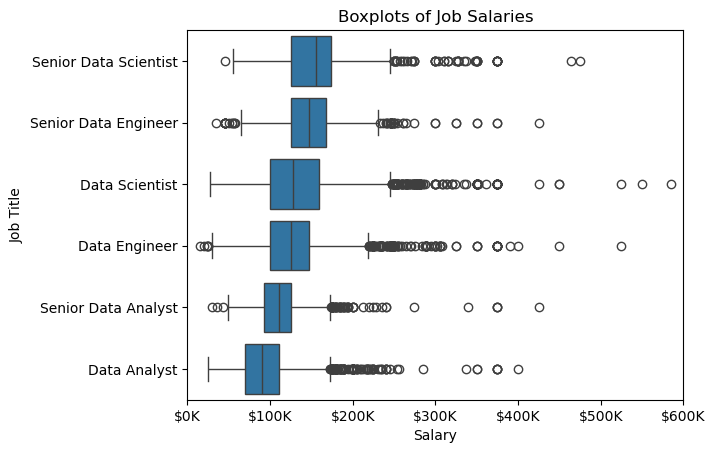

In [19]:
#Boxplot with seaborn

sns.boxplot(data = df_US_top6, x  ='salary_year_avg', y = 'job_title_short', order = job_order)
plt.title('Boxplots of Job Salaries')
plt.xlabel('Salary')
plt.ylabel('Job Title')
plt.xlim(0, 600000)
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
plt.show()

In [20]:
#Filter data for US data analyst roles

df_DA_US = df[(df['job_country'] == 'United States') & (df['job_title_short'] == 'Data Analyst')].copy()

In [21]:
#Drop missing data

df_DA_US = df_DA_US.dropna(subset = ['salary_year_avg'])

In [22]:
#Explode by job skills

df_DA_US_explode = df_DA_US.explode('job_skills')

In [ ]:
#Calculate the median pay by skill and pull the top 10 highest paying skills

df_DA_top_pay = df_DA_US_explode.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by = 'median', ascending = False)

df_DA_top_pay = df_DA_top_pay.head(10)

df_DA_top_pay

,count,median
job_skills,,
dplyr,2,196250.0
bitbucket,3,189000.0
gitlab,3,186000.0
solidity,1,179000.0
hugging face,1,175000.0
couchbase,1,160515.0
ansible,1,159640.0
mxnet,2,149000.0
cassandra,6,148250.0


In [29]:
#Pull the top 10 most frequent skills

df_DA_skills = df_DA_US_explode.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by = 'count', ascending = False)

df_DA_skills = df_DA_skills.head(10).sort_values(by = 'median', ascending = False)

df_DA_skills

,count,median
job_skills,,
python,1431,97500.00
tableau,1364,92875.00
r,893,92500.00
sql server,286,92500.00
sql,2508,91000.00
sas,926,90000.00
power bi,838,90000.00
powerpoint,462,85000.00
excel,1808,84392.00


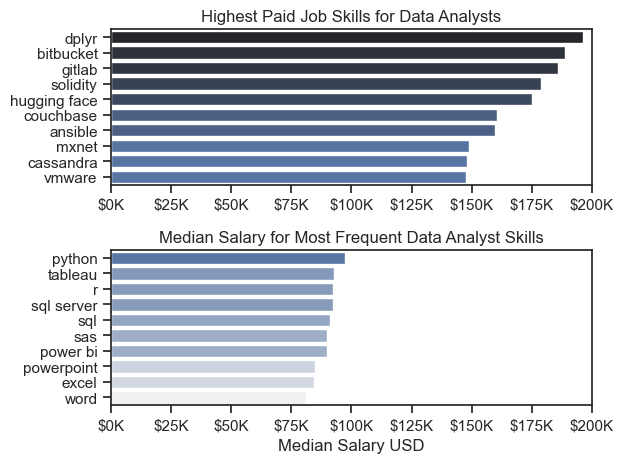

In [31]:
#Plot with seaborn

fig, ax = plt.subplots(2, 1)

sns.set_theme(style = 'ticks')

sns.barplot(data = df_DA_top_pay, x = 'median', y = df_DA_top_pay.index, ax = ax[0], hue = 'median', palette = 'dark:b_r')
ax[0].set_xlim(0, 200000)
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].set_title('Highest Paid Job Skills for Data Analysts')
ax[0].legend().remove()

sns.barplot(data = df_DA_skills, x = 'median', y = df_DA_skills.index, ax = ax[1], hue = 'median', palette = 'light:b')
ax[1].set_xlim(0, 200000)
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
ax[1].set_xlabel('Median Salary USD')
ax[1].set_ylabel('')
ax[1].set_title('Median Salary for Most Frequent Data Analyst Skills')
ax[1].legend().remove()

fig.tight_layout()
plt.show()